In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications import vgg16
import tensorflow as tf

import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np
import os

# Collect and Augment Data

In [2]:
project_path = "C:/Users/Natha/Artificial Intelligence/Tensorflow Image Recognition/DogBreedClassifier"

In [3]:
HEIGHT = 129
WIDTH = 148
input_shape = (WIDTH, HEIGHT, 3)

total_classes = 120

In [4]:
datagen = ImageDataGenerator(rescale=1./255, 
                             rotation_range=30, 
                             width_shift_range=0.1, 
                             height_shift_range=0.1, 
                             horizontal_flip=True,
                             validation_split=0.2,
                             shear_range=0.1,
                             zoom_range=0.1,
                             fill_mode="nearest")

train_data = datagen.flow_from_directory(f"{project_path}/data/Images", 
                                              target_size=(WIDTH, HEIGHT), 
                                              batch_size=50, 
                                              class_mode='categorical', 
                                              subset='training')

validation_data = datagen.flow_from_directory(f"{project_path}/data/Images", 
                                              target_size=(WIDTH, HEIGHT), 
                                              batch_size=50, 
                                              class_mode='categorical', 
                                              subset='validation')

Found 16508 images belonging to 120 classes.
Found 4072 images belonging to 120 classes.


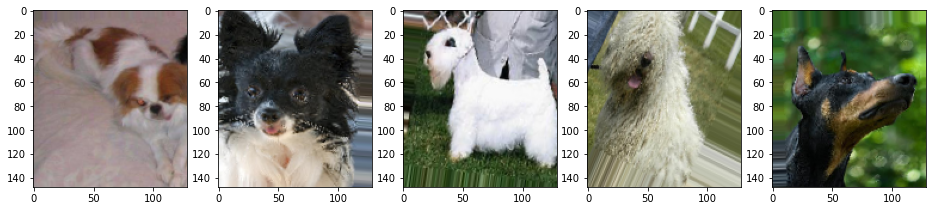

In [5]:
dog = [next(validation_data) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
l = [ax[i].imshow(dog[i][0][0]) for i in range(0,5)]

# Create Model

### VGG16

In [6]:
base_vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = base_vgg.layers[-1].output
output = tf.keras.layers.Flatten()(output)
vgg_layers = tf.keras.models.Model(base_vgg.input, output)

vgg_layers.trainable = False
for layer in vgg_layers.layers:
    layer.trainable = False
    
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_layers.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

C:\Users\Natha\AppData\Local\Temp\ipykernel_12092\1510272125.py:12: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x0000016CF33E60D0>,input_1,False
1,<keras.layers.convolutional.conv2d.Conv2D object at 0x0000016CF33E47C0>,block1_conv1,False
2,<keras.layers.convolutional.conv2d.Conv2D object at 0x0000016CF33E4A30>,block1_conv2,False
3,<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x0000016CF3603D60>,block1_pool,False
4,<keras.layers.convolutional.conv2d.Conv2D object at 0x0000016CF33E4E20>,block2_conv1,False
5,<keras.layers.convolutional.conv2d.Conv2D object at 0x0000016C8DE1F220>,block2_conv2,False
6,<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x0000016C8DE2DAF0>,block2_pool,False
7,<keras.layers.convolutional.conv2d.Conv2D object at 0x0000016C8DE285B0>,block3_conv1,False
8,<keras.layers.convolutional.conv2d.Conv2D object at 0x0000016C8DE2DAC0>,block3_conv2,False
9,<keras.layers.convolutional.conv2d.Conv2D object at 0x0000016C8DE39970>,block3_conv3,False


In [7]:
vgg_layers.trainable = True

for layer in vgg_layers.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    else:
        layer.trainable = False
        
layers = [(layer, layer.name, layer.trainable) for layer in vgg_layers.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x0000016CF33E60D0>,input_1,False
1,<keras.layers.convolutional.conv2d.Conv2D object at 0x0000016CF33E47C0>,block1_conv1,False
2,<keras.layers.convolutional.conv2d.Conv2D object at 0x0000016CF33E4A30>,block1_conv2,False
3,<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x0000016CF3603D60>,block1_pool,False
4,<keras.layers.convolutional.conv2d.Conv2D object at 0x0000016CF33E4E20>,block2_conv1,False
5,<keras.layers.convolutional.conv2d.Conv2D object at 0x0000016C8DE1F220>,block2_conv2,False
6,<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x0000016C8DE2DAF0>,block2_pool,False
7,<keras.layers.convolutional.conv2d.Conv2D object at 0x0000016C8DE285B0>,block3_conv1,False
8,<keras.layers.convolutional.conv2d.Conv2D object at 0x0000016C8DE2DAC0>,block3_conv2,False
9,<keras.layers.convolutional.conv2d.Conv2D object at 0x0000016C8DE39970>,block3_conv3,False


In [8]:
vgg_model = Sequential()
vgg_model.add(vgg_layers)

vgg_model.add(tf.keras.layers.Dense(512, activation='relu'))
vgg_model.add(tf.keras.layers.Dropout(0.3))
vgg_model.add(tf.keras.layers.Dense(512, activation='relu'))
vgg_model.add(tf.keras.layers.Dropout(0.3))

vgg_model.add(tf.keras.layers.Dense(total_classes, activation='sigmoid'))

vgg_model.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
                  metrics=['accuracy'])

NameError: name 'Sequential' is not defined

### Inception V3

In [9]:
base_inception = InceptionV3(weights='imagenet', include_top=False, 
                             input_shape=(WIDTH, HEIGHT, 3))
                             
# Add a global spatial average pooling layer
out = base_inception.output
out = tf.keras.layers.GlobalAveragePooling2D()(out)
out = tf.keras.layers.Dense(512, activation='relu')(out)
out = tf.keras.layers.Dense(512, activation='relu')(out)
out = tf.keras.layers.Dense(512, activation='relu')(out)
predictions = tf.keras.layers.Dense(total_classes, activation='softmax')(out)

inception_model = tf.keras.models.Model(inputs=base_inception.input, outputs=predictions)

# only if we want to freeze layers
for layer in base_inception.layers:
    layer.trainable = False
    
# Compile 
inception_model.compile(tf.keras.optimizers.Adam(learning_rate=1e-3), 
                        loss='categorical_crossentropy', 
                        metrics=['accuracy']) 
inception_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 148, 129, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 73, 64, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 73, 64, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                            

 batch_normalization_10 (BatchN  (None, 16, 13, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 16, 13, 32)  96          ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 16, 13, 64)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 16, 13, 64)   0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activatio

 conv2d_20 (Conv2D)             (None, 16, 13, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 16, 13, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 16, 13, 48)  144         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 16, 13, 96)  288         ['conv2d_23[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                                                                                  
 conv2d_34 (Conv2D)             (None, 7, 6, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 7, 6, 128)   384         ['conv2d_34[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 7, 6, 128)    0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_35 (Conv2D)             (None, 7, 6, 128)    114688      ['activation_34[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 activation_44 (Activation)     (None, 7, 6, 160)    0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 7, 6, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_45 (BatchN  (None, 7, 6, 160)   480         ['conv2d_45[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 7, 6, 160)    0           ['batch_normalization_45[0][0]'] 
                                                                                                  
 conv2d_41

 batch_normalization_55 (BatchN  (None, 7, 6, 160)   480         ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 7, 6, 160)    0           ['batch_normalization_55[0][0]'] 
                                                                                                  
 conv2d_51 (Conv2D)             (None, 7, 6, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_56 (Conv2D)             (None, 7, 6, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_51 (BatchN  (None, 7, 6, 160)   480         ['conv2d_51[0][0]']              
 ormalizat

 conv2d_61 (Conv2D)             (None, 7, 6, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 7, 6, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 7, 6, 192)   576         ['conv2d_61[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 7, 6, 192)   576         ['conv2d_66[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 7, 6, 192)   576         ['conv2d_74[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_70 (Activation)     (None, 7, 6, 192)    0           ['batch_normalization_70[0][0]'] 
                                                                                                  
 activation_74 (Activation)     (None, 7, 6, 192)    0           ['batch_normalization_74[0][0]'] 
                                                                                                  
 conv2d_71 (Conv2D)             (None, 3, 2, 320)    552960      ['activation_70[0][0]']          
          

                                                                                                  
 activation_82 (Activation)     (None, 3, 2, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 3, 2, 384)    0           ['batch_normalization_83[0][0]'] 
                                                                                                  
 batch_normalization_84 (BatchN  (None, 3, 2, 192)   576         ['conv2d_84[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_76 (Activation)     (None, 3, 2, 320)    0           ['batch_normalization_76[0][0]'] 
                                                                                                  
 mixed9_0 

 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 3, 2, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 3, 2, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
                                                                                                  
 concatenate_1 (Concatenate)    (None, 3, 2, 768)    0           ['activation_91[0][0]',          
                                                                  'activation_92[0][0]']          
                                                                                                  
 activatio

### Xception

In [12]:
base_xception = Xception(weights="imagenet", include_top=False, input_shape=(WIDTH, HEIGHT, 3))

for layer in base_xception.layers:
    layer.trainable = False

x = base_xception.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
predictions = tf.keras.layers.Dense(total_classes, activation='softmax')(x)

xception_model = tf.keras.models.Model(inputs=base_xception.input, outputs=predictions)
xception_model.compile(tf.keras.optimizers.Adam(lr=.1e-3), 
                       loss='categorical_crossentropy', 
                       metrics=['accuracy'])

xception_model.summary()
layers = [(layer, layer.name, layer.trainable) for layer in base_xception.layers]
layers = layers[15:30]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 148, 129, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 73, 64, 32)   864         ['input_5[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 73, 64, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                            

 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 18, 16, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 18, 16, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)                                                                                        
                                                                                                  
 conv2d_104 (Conv2D)            (None, 9, 8, 728)    186368      ['add_25[0][0]']                 
                                                                                                  
 block4_po

                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 9, 8, 728)   2912        ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 9, 8, 728)   0           ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block7_sepconv2 (SeparableConv  (None, 9, 8, 728)   536536      ['block7_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_se

                                                                  'add_30[0][0]']                 
                                                                                                  
 block10_sepconv1_act (Activati  (None, 9, 8, 728)   0           ['add_31[0][0]']                 
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 9, 8, 728)   536536      ['block10_sepconv1_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block10_sepconv1_bn (BatchNorm  (None, 9, 8, 728)   2912        ['block10_sepconv1[0][0]']       
 alization)                                                                                       
          

 block12_sepconv3 (SeparableCon  (None, 9, 8, 728)   536536      ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 9, 8, 728)   2912        ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_34 (Add)                   (None, 9, 8, 728)    0           ['block12_sepconv3_bn[0][0]',    
                                                                  'add_33[0][0]']                 
                                                                                                  
 block13_sepconv1_act (Activati  (None, 9, 8, 728)   0           ['add_34[0][0]']                 
 on)      

C:\Users\Natha\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


,Layer Type,Layer Name,Layer Trainable
0,<keras.layers.merging.add.Add object at 0x0000016EDCFD73D0>,add_24,False
1,<keras.layers.core.activation.Activation object at 0x0000016EDCFEA520>,block3_sepconv1_act,False
2,<keras.layers.convolutional.separable_conv2d.SeparableConv2D object at 0x0000016EDCFE2D00>,block3_sepconv1,False
3,<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x0000016EDCFF4520>,block3_sepconv1_bn,False
4,<keras.layers.core.activation.Activation object at 0x0000016EDCFF45E0>,block3_sepconv2_act,False
5,<keras.layers.convolutional.separable_conv2d.SeparableConv2D object at 0x0000016EDCFEAE80>,block3_sepconv2,False
6,<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x0000016EDCD64100>,block3_sepconv2_bn,False
7,<keras.layers.convolutional.conv2d.Conv2D object at 0x0000016EDCFE2190>,conv2d_103,False
8,<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x0000016EDCFEA9A0>,block3_pool,False
9,<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x0000016EDCFEA4F0>,batch_normalization_103,False


# Train Model

In [13]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}):
        if logs.get('val_accuracy') > 0.95:
            print("Threshold accuracy has been reached.")
            self.model.stop_training = True
            
callbacks = myCallback()

In [16]:
history = xception_model.fit(train_data, epochs=20,
                              validation_data=validation_data,
                              verbose=1, callbacks=[callbacks])

Epoch 1/20
331/331 [==============================] - 141s 417ms/step - loss: 3.2499 - accuracy: 0.2827 - val_loss: 2.3918 - val_accuracy: 0.3919
Epoch 2/20
331/331 [==============================] - 80s 241ms/step - loss: 2.1610 - accuracy: 0.4491 - val_loss: 2.1782 - val_accuracy: 0.4501
Epoch 3/20
331/331 [==============================] - 80s 241ms/step - loss: 2.0189 - accuracy: 0.4756 - val_loss: 2.0874 - val_accuracy: 0.4651
Epoch 4/20
331/331 [==============================] - 80s 241ms/step - loss: 1.9185 - accuracy: 0.4984 - val_loss: 2.0877 - val_accuracy: 0.4627
Epoch 5/20
331/331 [==============================] - 80s 241ms/step - loss: 1.8348 - accuracy: 0.5140 - val_loss: 2.0911 - val_accuracy: 0.4595
Epoch 6/20
331/331 [==============================] - 80s 242ms/step - loss: 1.7898 - accuracy: 0.5228 - val_loss: 2.0811 - val_accuracy: 0.4686
Epoch 7/20
331/331 [==============================] - 80s 242ms/step - loss: 1.7269 - accuracy: 0.5376 - val_loss: 2.0323 - val_a

In [17]:
xception_model.save("dog_breed_classifier")

INFO:tensorflow:Assets written to: dog_breed_classifier\assets


INFO:tensorflow:Assets written to: dog_breed_classifier\assets


# Inference

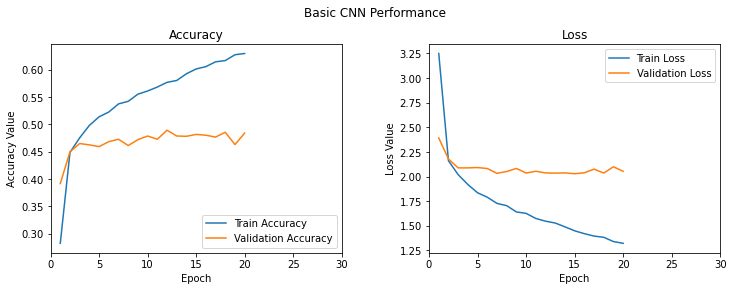

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,21))

ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

1/1 [==============================] - 0s 14ms/step
pug:0.9679294228553772


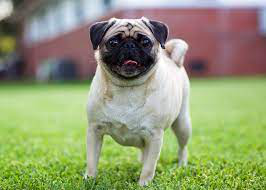

In [23]:
result = os.listdir(f'{project_path}/data/Images')
results = []
for item in result:
    x = item.split("-")
    results.append(x[-1])
    
test_image = Image.open(f'{project_path}/test/dog_image6.jpg')
image = test_image.resize((HEIGHT, WIDTH))
image = np.expand_dims(image, axis=0)
image = np.array(image)
image = image/255
print(f'{results[np.argmax(xception_model.predict([image]))]}:{np.max(xception_model.predict([image]))}')
test_image

In [ ]:
result = os.listdir('C:/Users/Natha/Downloads/archive/images/Images')
results = []
for item in result:
    x = item.split("-")
    results.append(x[-1])
    

video = cv2.VideoCapture(0)
while True:
    _, frame = video.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    img = cv2.resize(frame, (147, 128))
    image = np.expand_dims(image, axis=0)
    image = np.array(image)
    image = image/255
    
    cv2.putText(frame, f'{results[np.argmax(xceptionModel.predict(img_array))]}: {np.max(xceptionModel.predict(img_array))}', (0, 60), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), 2)
    cv2.imshow("image", image)
    key = cv2.waitKey(1)
    if key==ord('q'):
        break
        
video.release()
cv2.destroyAllWindows()